In [ ]:
## Importing required packages

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
import cv2

(194, 259, 3)
(256, 256, 3)


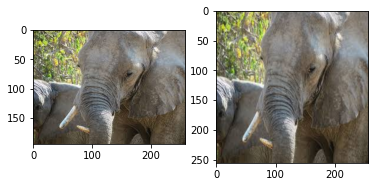

In [ ]:
image_1=cv2.imread('/content/drive/MyDrive/archive/dataset/train/African/af_tr1.jpg')

## original image

plt.subplot(1,2,1)
plt.imshow(image_1[:,:,::-1])

print(image_1.shape)

## resizing the image

image_resize=cv2.resize(image_1,((256,256)))

print(image_resize.shape)
plt.subplot(1,2,2)
plt.imshow(image_resize[:,:,::-1])


In [ ]:
## setting same size of an image

img_height,img_width=[256,256]

In [ ]:
## finding the data:

path='/content/drive/MyDrive/archive/dataset'

In [ ]:
## Finding path for both training and test data

train_data_path='/content/drive/MyDrive/archive/dataset/train'
test_data_path='/content/drive/MyDrive/archive/dataset/test'

In [ ]:
## importing packages

import tensorflow
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
## data_preprocessing on the image using iamgedatagenerator module

training_prepross=ImageDataGenerator(rescale=1./255,
                                     shear_range=0.2,
                                     zoom_range=0.2,
                                     horizontal_flip=True,
                                     vertical_flip=True)

## training is done with rescaling the pixel so for testing it has to be followed


testing_prepross=ImageDataGenerator(1./255)

In [ ]:
# Finding the label folders 
## using glob we can find the number of label folders

import glob
from glob import glob

glob('/content/drive/MyDrive/archive/dataset/train/*')

['/content/drive/MyDrive/archive/dataset/train/African',
 '/content/drive/MyDrive/archive/dataset/train/Asian']

In [ ]:
## finding test labels using glob

glob('/content/drive/MyDrive/archive/dataset/test/*')

['/content/drive/MyDrive/archive/dataset/test/African',
 '/content/drive/MyDrive/archive/dataset/test/Asian']

In [ ]:
labels=['African','Asian']

In [ ]:
## collecting image from training labels folders and test label folders:

train_data=training_prepross.flow_from_directory(train_data_path,
                                                 target_size=(img_height,img_width),
                                                 classes=labels,
                                                 class_mode='binary',
                                                 batch_size=32)


test_data=testing_prepross.flow_from_directory(test_data_path,
                                              target_size=(img_height,img_width),
                                              classes=labels,
                                              class_mode='binary',
                                              batch_size=32)

                                   

Found 840 images belonging to 2 classes.
Found 188 images belonging to 2 classes.


In [ ]:
## now its time for building an CNN model architecture
## importing required packages:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Flatten,Activation,Dense
from tensorflow.keras.activations import relu,sigmoid,softmax
from tensorflow.keras.optimizers import Adam

In [ ]:
## Building architecture

model=Sequential()

## first hidden layer in CNN
model.add(Conv2D(128,kernel_size=(3,3),padding='same',activation='relu',input_shape=(img_height,img_width,3)))
model.add(MaxPool2D(pool_size=(2,2)))

## second hidden layer in CNN
model.add(Conv2D(64,kernel_size=(3,3),padding='same',activation='relu',input_shape=(img_height,img_width,3)))
model.add(MaxPool2D(pool_size=(2,2)))

## third hidden layer in CNN
model.add(Conv2D(32,kernel_size=(3,3),padding='same',activation='relu',input_shape=(img_height,img_width,3)))
model.add(MaxPool2D(pool_size=(2,2)))

## fourth hidden layer in CNN
model.add(Conv2D(16,kernel_size=(3,3),padding='same',activation='relu',input_shape=(img_height,img_width,3)))
model.add(MaxPool2D(pool_size=(2,2)))

## fifth hidden layer in CNN
model.add(Conv2D(8,kernel_size=(3,3),padding='same',activation='relu',input_shape=(img_height,img_width,3)))
model.add(MaxPool2D(pool_size=(2,2)))

## sixth hidden layer in CNN
model.add(Conv2D(4,kernel_size=(3,3),padding='same',activation='relu',input_shape=(img_height,img_width,3)))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten()) ## converting 1-d and 1-d to ANN

model.add(Dense(32,activation='relu')) # first hidden layer in ANN
model.add(Dense(16,activation='relu')) # second hidden layer in ANN
model.add(Dense(8,activation='relu')) # third hidden layer in ANN

model.add(Dense(1,activation='sigmoid')) ## sigmoid is used since it is binary classification


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 128)     3584      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 128, 128)    0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 64)      73792     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 64, 64, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 32)        18464     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 32, 32, 32)       0

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['Accuracy'])

In [ ]:
model.fit(train_data,epochs=100)

Epoch 1/100
27/27 [==============================] - 113s 4s/step - loss: 0.6938 - Accuracy: 0.4667
Epoch 2/100
27/27 [==============================] - 15s 568ms/step - loss: 0.6933 - Accuracy: 0.5071
Epoch 3/100
27/27 [==============================] - 15s 571ms/step - loss: 0.6931 - Accuracy: 0.5036
Epoch 4/100
27/27 [==============================] - 15s 559ms/step - loss: 0.6930 - Accuracy: 0.5060
Epoch 5/100
27/27 [==============================] - 16s 574ms/step - loss: 0.6933 - Accuracy: 0.5310
Epoch 6/100
27/27 [==============================] - 16s 575ms/step - loss: 0.6939 - Accuracy: 0.5036
Epoch 7/100
27/27 [==============================] - 15s 561ms/step - loss: 0.6910 - Accuracy: 0.5488
Epoch 8/100
27/27 [==============================] - 15s 564ms/step - loss: 0.6934 - Accuracy: 0.4893
Epoch 9/100
27/27 [==============================] - 15s 559ms/step - loss: 0.6933 - Accuracy: 0.4881
Epoch 10/100
27/27 [==============================] - 16s 576ms/step - loss: 0.6875 

In [ ]:
model.history.history['Accuracy']

[0.46666666865348816,
 0.5071428418159485,
 0.5035714507102966,
 0.5059523582458496,
 0.5309523940086365,
 0.5035714507102966,
 0.5488095283508301,
 0.4892857074737549,
 0.488095223903656,
 0.5285714268684387,
 0.523809552192688,
 0.5642856955528259,
 0.5249999761581421,
 0.5083333253860474,
 0.5,
 0.5047619342803955,
 0.49761903285980225,
 0.5452380776405334,
 0.5273809432983398,
 0.5130952596664429,
 0.5035714507102966,
 0.5416666865348816,
 0.5523809790611267,
 0.5642856955528259,
 0.5797619223594666,
 0.511904776096344,
 0.5654761791229248,
 0.5583333373069763,
 0.5702381134033203,
 0.5821428298950195,
 0.5678571462631226,
 0.5940476059913635,
 0.5678571462631226,
 0.4892857074737549,
 0.5047619342803955,
 0.5,
 0.4988095164299011,
 0.5083333253860474,
 0.5047619342803955,
 0.5023809671401978,
 0.5357142686843872,
 0.5785714387893677,
 0.5761904716491699,
 0.5666666626930237,
 0.574999988079071,
 0.5595238208770752,
 0.5964285731315613,
 0.5714285969734192,
 0.5690476298332214,
 0.

In [ ]:
model.history.history['loss']

[0.6937819123268127,
 0.6933143138885498,
 0.6930990219116211,
 0.6930332779884338,
 0.6932920217514038,
 0.6939283609390259,
 0.6909523606300354,
 0.6934006214141846,
 0.6932575106620789,
 0.687484622001648,
 0.6873762011528015,
 0.6839771270751953,
 0.6920256018638611,
 0.6934664845466614,
 0.6932395100593567,
 0.6929938197135925,
 0.69303959608078,
 0.6921274662017822,
 0.6918421387672424,
 0.6919647455215454,
 0.6935129165649414,
 0.6895049214363098,
 0.6890772581100464,
 0.6891970634460449,
 0.6855632066726685,
 0.6935117244720459,
 0.6866874098777771,
 0.686726987361908,
 0.6869519948959351,
 0.6841809749603271,
 0.6877004504203796,
 0.6836430430412292,
 0.681239902973175,
 0.6945289969444275,
 0.6930863261222839,
 0.6936516761779785,
 0.6932021975517273,
 0.6927143931388855,
 0.6930569410324097,
 0.6945743560791016,
 0.6893976926803589,
 0.6836286187171936,
 0.6815354228019714,
 0.6829665303230286,
 0.6834251284599304,
 0.6807236671447754,
 0.6793631315231323,
 0.684141993522644

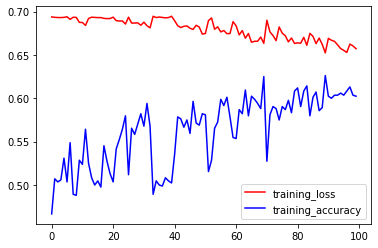

In [ ]:
plt.plot(np.arange(100) , model.history.history['loss'] , color = 'r' , label = 'training_loss')
plt.plot(np.arange(100) , model.history.history['Accuracy'] , color = 'b' , label = 'training_accuracy')
plt.legend(loc = 0)
plt.show()


In [ ]:
test_report= model.predict(test_data)
test_report

/usr/local/lib/python3.8/dist-packages/keras/preprocessing/image.py:1663: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


6/6 [==============================] - 45s 9s/step


array([[2.8638935e-06],
       [1.0000000e+00],
       [1.5341873e-01],
       [8.9116680e-25],
       [9.7724140e-01],
       [1.0000000e+00],
       [4.1890207e-01],
       [0.0000000e+00],
       [5.9677735e-02],
       [5.6372798e-04],
       [5.6937989e-07],
       [3.9453316e-09],
       [5.5844258e-16],
       [4.7015216e-22],
       [1.8048710e-10],
       [1.6803527e-32],
       [4.1160637e-01],
       [0.0000000e+00],
       [1.5026144e-07],
       [1.9005442e-21],
       [9.9214572e-01],
       [3.3095785e-12],
       [6.8529903e-07],
       [2.1013280e-14],
       [1.9318148e-02],
       [2.9303416e-07],
       [3.9426634e-23],
       [1.1938057e-16],
       [9.9882084e-01],
       [1.1930096e-38],
       [3.9849889e-05],
       [1.5871793e-14],
       [3.5364027e-07],
       [0.0000000e+00],
       [1.6535792e-03],
       [0.0000000e+00],
       [3.0262955e-03],
       [2.7413929e-20],
       [6.3029341e-03],
       [9.9999988e-01],
       [9.7395647e-01],
       [0.000000

In [ ]:
c=[]
for i in test_report:
  if i>0.5:
    c.append(1)
  else:
    c.append(0)  

In [ ]:
## validation report

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [ ]:
accuracy_score(test_data.classes, c)

0.5053191489361702

In [ ]:
confusion_matrix(test_data.classes,c)

array([[77, 20],
       [73, 18]])

In [ ]:
print(classification_report(test_data.classes,c))

              precision    recall  f1-score   support

           0       0.51      0.79      0.62        97
           1       0.47      0.20      0.28        91

    accuracy                           0.51       188
   macro avg       0.49      0.50      0.45       188
weighted avg       0.49      0.51      0.46       188



In [ ]:
##CHECKING WITH OWN DATA

In [ ]:
## collecting images from internet and making predictions

In [ ]:
import cv2

In [ ]:
def testing_images(path):
  img=cv2.imread(path)

 ## print(img) pixel values in image:
  img=cv2.resize(img,(img_height,img_width))
 ## resize an image because it was trained on 256

  img=np.array(img)/255.0

 ## scaling down the values between 0-1
  img=np.expand_dims(img,axis=0)

 # print(img.shape) making it as 1 image data
  result=model.predict(img)
  print(result)

  if result>0.5:
        print('African')
  else:
        print('Asian')

  image =plt.imread(path)
  plt.imshow(image)  

1/1 [==============================] - 1s 673ms/step
[[0.55003643]]
African


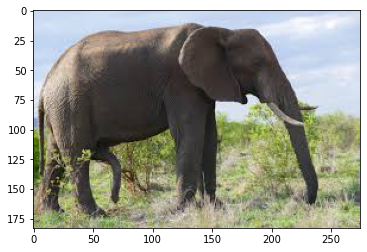

In [ ]:
testing_images('/content/drive/MyDrive/archive/dataset/test/African/af_te1.jpg') 

1/1 [==============================] - 0s 21ms/step
[[0.6093508]]
African


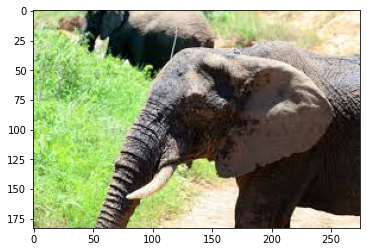

In [ ]:
testing_images('/content/drive/MyDrive/archive/dataset/test/African/af_te11.jpg') 

1/1 [==============================] - 0s 26ms/step
[[0.54875106]]
African


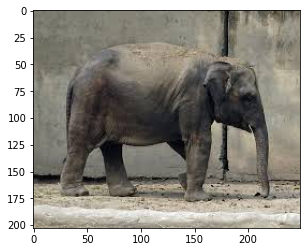

In [ ]:
testing_images('/content/drive/MyDrive/archive/dataset/test/Asian/as_te10.jpg')

1/1 [==============================] - 0s 20ms/step
[[0.5011716]]
African


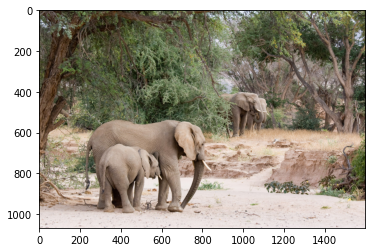

In [ ]:
testing_images('/content/drive/MyDrive/archive/dataset/test/Asian/as_te16.jpg')